In [1]:
#Core
import numpy as np
from os import getcwd
from os.path import join
import pandas as pd


#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Others
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#Function to Split the data into training and testing adn store in excel file: parameter dataframe
def splitDF(df):
    train, test = train_test_split(df, test_size=0.1, random_state=500, shuffle=True)
    train.to_excel(join(getcwd(),"../train.xlsx"))
    test.to_excel(join(getcwd(),"../test.xlsx"))
    return train, test

#Function to Read training and testing data from file
def getSplitFromFile():
    train = pd.read_excel(join(getcwd(), '../train.xlsx'))
    test = pd.read_excel(join(getcwd(), '../test.xlsx'))
    return train ,test

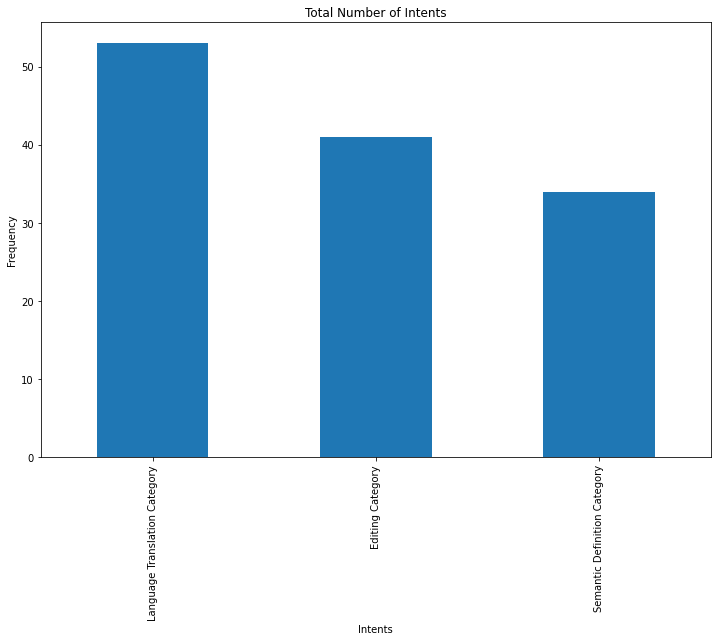

In [3]:

df = pd.read_excel(join(getcwd(), '../Intent_classification_filtered.xlsx'))

#Filter out itntents with less than 25 files. 
df = df.groupby('Intents').filter(lambda x : len(x)>=25)
ax = df['Intents'].value_counts().plot(kind='bar',
                                    figsize=(12,8),
                                    title="Total Number of Intents")
ax.set_xlabel("Intents")
ax.set_ylabel("Frequency")
ax.plot()



#Uncomment below to get taring and testing data from file  
train, test =splitDF(df)
#train, test =getSplitFromFile()




[]

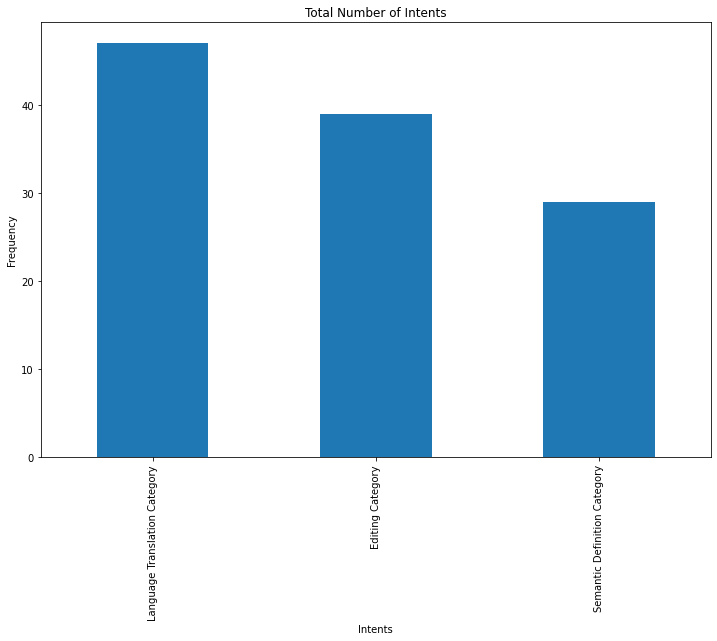

In [4]:
#Plot of total Number of files according to Intents
ax = train['Intents'].value_counts().plot(kind='bar',
                                    figsize=(12,8),
                                    title="Total Number of Intents")
ax.set_xlabel("Intents")
ax.set_ylabel("Frequency")
ax.plot()

[]

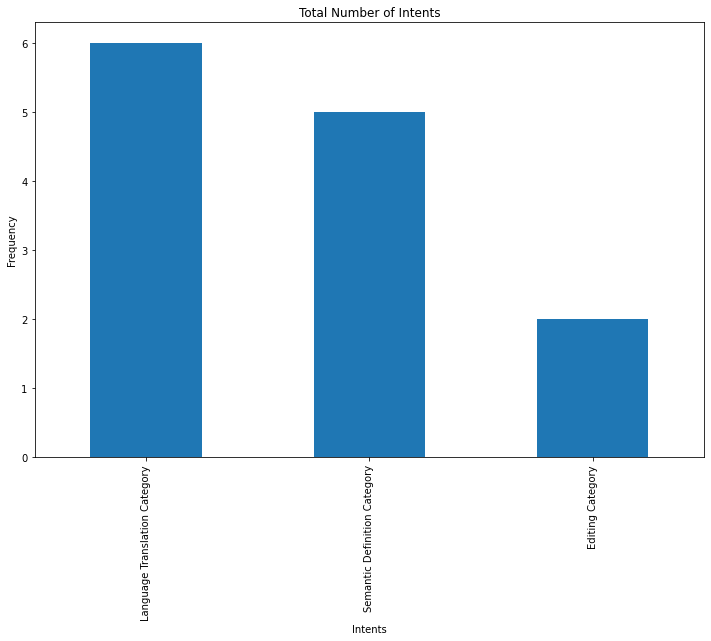

In [5]:
#Plot of Number of files according to Intents for testing
ax = test['Intents'].value_counts().plot(kind='bar',
                                    figsize=(12,8),
                                    title="Total Number of Intents")
ax.set_xlabel("Intents")
ax.set_ylabel("Frequency")
ax.plot()

In [6]:
def perceptron(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),("perc", Perceptron(max_iter=1000))])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI) , predicted, precision, recall

In [7]:
def multinomialNB(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    print(recall)
    return np.mean(predicted == testI), predicted, precision, recall

    

In [8]:
def passiveAggressiveClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),("passive_agg", PassiveAggressiveClassifier(max_iter=1000))])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [9]:
def logisticRegression(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),("log_reg", LogisticRegression(max_iter=1000))])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [10]:
def sGDClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, random_state=42)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [11]:
def decisionTreeClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-tree', DecisionTreeClassifier()),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [12]:
def mLPClassifier(trainC,trainI,testC,testI):
    text_clf = text_clf_mlp = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                          ('clf-mlp', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1,max_iter=1000)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [13]:
def randomForestClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-rf', RandomForestClassifier(max_depth=10, random_state=0)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [14]:
def kNeighborsClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', KNeighborsClassifier(n_neighbors=1)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted,precision, recall

In [15]:
def applyON(feature,target):
    accMul,preMul,precMul,recMul = multinomialNB(train[feature],train[target],test[feature],test[target])
    accPrec,prePrec,precperc,recperc = perceptron(train[feature],train[target],test[feature],test[target])
    accPass,prePass,precPass,recPass =  passiveAggressiveClassifier(train[feature],train[target],test[feature],test[target])
    accLog,preLog, precLog,recLog =  logisticRegression(train[feature],train[target],test[feature],test[target])
    accSGD,preSGD,precSGD,recSGD =  sGDClassifier(train[feature],train[target],test[feature],test[target])
    accDT,preDT,precDT,recDT =  decisionTreeClassifier(train[feature],train[target],test[feature],test[target])
    accMLP,preMLP,precMLP,recMLP =  mLPClassifier(train[feature],train[target],test[feature],test[target])
    accRF,preRF,precRF,recRF =  randomForestClassifier(train[feature],train[target],test[feature],test[target])
    accKNN,preKNN, precKNN,recKNN=  kNeighborsClassifier(train[feature],train[target],test[feature],test[target])
    
    global output_dict
    output_dict = [{'MultinomialNB':accMul,'Perceptron':accPrec,'PassiveAggressiveClassifier':accPass,'LogisticRegression':accLog,'SGDClassifier':accSGD,'DecisionTreeClassifier':accDT,'MLPClassifier':accMLP,'RandomForestClassifier':accRF,'KNeighborsClassifier':accKNN},
                {'MultinomialNB':preMul,'Perceptron':prePrec,'PassiveAggressiveClassifier':prePass,'LogisticRegression':preLog,'SGDClassifier':preSGD,'DecisionTreeClassifier':preDT,'MLPClassifier':preMLP,'RandomForestClassifier':preRF,'KNeighborsClassifier':preKNN}, 
                {'MultinomialNB':precMul,'Perceptron':precperc,'PassiveAggressiveClassifier':precPass,'LogisticRegression':precLog,'SGDClassifier':precSGD,'DecisionTreeClassifier':precDT,'MLPClassifier':precMLP,'RandomForestClassifier':precRF,'KNeighborsClassifier':precKNN},
                {'MultinomialNB':recMul,'Perceptron':recperc,'PassiveAggressiveClassifier':recPass,'LogisticRegression':recLog,'SGDClassifier':recSGD,'DecisionTreeClassifier':recDT,'MLPClassifier':recMLP,'RandomForestClassifier':recRF,'KNeighborsClassifier':recKNN}]
 
    return output_dict

In [16]:
X,Y,Z,A = applyON('Content','Intents')
print(X)
print(Z)
print(A)

for key,key_1 in zip(Z.values(),A.values()):
        print(2 * key * key_1/(key + key_1))


C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.6923076923076923


C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


{'MultinomialNB': 0.6923076923076923, 'Perceptron': 0.7692307692307693, 'PassiveAggressiveClassifier': 0.8461538461538461, 'LogisticRegression': 0.6923076923076923, 'SGDClassifier': 0.7692307692307693, 'DecisionTreeClassifier': 0.6153846153846154, 'MLPClassifier': 0.7692307692307693, 'RandomForestClassifier': 0.6923076923076923, 'KNeighborsClassifier': 0.6153846153846154}
{'MultinomialNB': 0.8153846153846154, 'Perceptron': 0.7948717948717948, 'PassiveAggressiveClassifier': 0.8846153846153846, 'LogisticRegression': 0.7307692307692307, 'SGDClassifier': 0.8461538461538461, 'DecisionTreeClassifier': 0.6102564102564102, 'MLPClassifier': 0.7912087912087912, 'RandomForestClassifier': 0.75, 'KNeighborsClassifier': 0.6153846153846154}
{'MultinomialNB': 0.6923076923076923, 'Perceptron': 0.7692307692307693, 'PassiveAggressiveClassifier': 0.8461538461538461, 'LogisticRegression': 0.6923076923076923, 'SGDClassifier': 0.7692307692307693, 'DecisionTreeClassifier': 0.6153846153846154, 'MLPClassifier':

C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [17]:
X,Y, Z, A = applyON('stop_words_filtered','Intents')
print(X)
print(Z)
print(A)

for key,key_1 in zip(Z.values(),A.values()):
        print(2 * key * key_1/(key + key_1))

C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.6923076923076923


C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\

{'MultinomialNB': 0.6923076923076923, 'Perceptron': 0.7692307692307693, 'PassiveAggressiveClassifier': 0.8461538461538461, 'LogisticRegression': 0.7692307692307693, 'SGDClassifier': 0.7692307692307693, 'DecisionTreeClassifier': 0.38461538461538464, 'MLPClassifier': 0.5384615384615384, 'RandomForestClassifier': 0.6923076923076923, 'KNeighborsClassifier': 0.6153846153846154}
{'MultinomialNB': 0.8153846153846154, 'Perceptron': 0.7912087912087912, 'PassiveAggressiveClassifier': 0.8846153846153846, 'LogisticRegression': 0.8461538461538461, 'SGDClassifier': 0.8461538461538461, 'DecisionTreeClassifier': 0.37692307692307697, 'MLPClassifier': 0.5714285714285714, 'RandomForestClassifier': 0.7435897435897437, 'KNeighborsClassifier': 0.6230769230769231}
{'MultinomialNB': 0.6923076923076923, 'Perceptron': 0.7692307692307693, 'PassiveAggressiveClassifier': 0.8461538461538461, 'LogisticRegression': 0.7692307692307693, 'SGDClassifier': 0.7692307692307693, 'DecisionTreeClassifier': 0.38461538461538464,

C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [18]:

X,Y,Z, A = applyON('stemmed_content','Intents')
print(X)
print(Z)
print(A)

for key,key_1 in zip(Z.values(),A.values()):
        print(2 * key * key_1/(key + key_1))

C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.6923076923076923


C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\srnir\anaconda3\

{'MultinomialNB': 0.6923076923076923, 'Perceptron': 0.6923076923076923, 'PassiveAggressiveClassifier': 0.6153846153846154, 'LogisticRegression': 0.7692307692307693, 'SGDClassifier': 0.7692307692307693, 'DecisionTreeClassifier': 0.38461538461538464, 'MLPClassifier': 0.6923076923076923, 'RandomForestClassifier': 0.6153846153846154, 'KNeighborsClassifier': 0.6153846153846154}
{'MultinomialNB': 0.8153846153846154, 'Perceptron': 0.7307692307692307, 'PassiveAggressiveClassifier': 0.6025641025641026, 'LogisticRegression': 0.8461538461538461, 'SGDClassifier': 0.7719780219780219, 'DecisionTreeClassifier': 0.3901098901098901, 'MLPClassifier': 0.8153846153846154, 'RandomForestClassifier': 0.7252747252747253, 'KNeighborsClassifier': 0.6230769230769231}
{'MultinomialNB': 0.6923076923076923, 'Perceptron': 0.6923076923076923, 'PassiveAggressiveClassifier': 0.6153846153846154, 'LogisticRegression': 0.7692307692307693, 'SGDClassifier': 0.7692307692307693, 'DecisionTreeClassifier': 0.38461538461538464, 

C:\Users\srnir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np
#clf = MultinomialNB().fit(X_train_tfidf, train.Intent)

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),('tfidf', TfidfTransformer()),("passive_agg", PassiveAggressiveClassifier(max_iter=1000))])
text_clf = text_clf.fit(train.stemmed_content, train.Intents)
predicted = text_clf.predict(test.stemmed_content)
np.mean(predicted == test.Intents)

0.6153846153846154

In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np
#clf = MultinomialNB().fit(X_train_tfidf, train.Intent)

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),('tfidf', TfidfTransformer()),("log_reg", LogisticRegression(max_iter=1000))])
text_clf = text_clf.fit(train.stemmed_content, train.Intents)
predicted = text_clf.predict(test.stemmed_content)
np.mean(predicted == test.Intents)

0.7692307692307693

In [21]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, random_state=42)),])
_ = text_clf_svm.fit(train.stemmed_content, train.Intents)
predicted_svm = text_clf_svm.predict(test.stemmed_content)
np.mean(predicted_svm == test.Intents)

0.7692307692307693

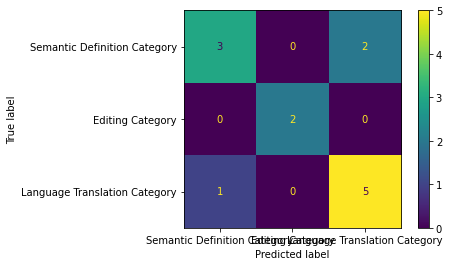

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay



cm = confusion_matrix(test.Intents, predicted_svm, labels=df.Intents.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df.Intents.unique())
disp.plot() 

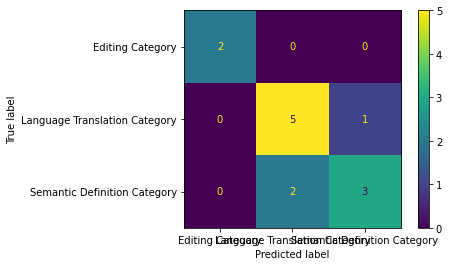

In [23]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(test.Intents, predicted_svm, labels=text_clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=text_clf_svm.classes_)
disp.plot() 

In [24]:
from sklearn.tree import DecisionTreeClassifier

text_clf_tree = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-tree', DecisionTreeClassifier()),])
_ = text_clf_tree.fit(train.stemmed_content, train.Intents)
predicted_tree = text_clf_tree.predict(test.stemmed_content)
np.mean(predicted_tree == test.Intents)

0.38461538461538464

In [25]:
from sklearn.neural_network import MLPClassifier

text_clf_mlp = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                          ('clf-mlp', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1,max_iter=1000)),])

_ = text_clf_mlp.fit(train.stemmed_content, train.Intents)
predicted_mlp = text_clf_mlp.predict(test.stemmed_content)
np.mean(predicted_mlp == test.Intents)

0.6923076923076923

In [26]:
from sklearn.ensemble import RandomForestClassifier
text_clf_rf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
('clf-rf', RandomForestClassifier(max_depth=10, random_state=0)),])

_ = text_clf_rf.fit(train.stemmed_content, train.Intents)
predicted_rf = text_clf_rf.predict(test.stemmed_content)
np.mean(predicted_rf == test.Intents)

0.6153846153846154

In [27]:
from sklearn.neighbors import KNeighborsClassifier
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', KNeighborsClassifier(n_neighbors=1)),])
text_clf = text_clf.fit(train.stemmed_content, train.Intents)
predicted = text_clf.predict(test.stemmed_content)
np.mean(predicted == test.Intents)

0.6153846153846154